In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/BrainDeadEmotionDataset.zip' -d '/content/Data/'
!unzip '/content/drive/MyDrive/generated_augmented.zip' -d '/content/Data/'
!mkdir '/content/Data/checkpoint'

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_24_3250.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_24_3873.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_24_8078.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_24_9194.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_24_9871.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_25_1564.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_25_3335.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_25_4099.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_25_4325.png  
  inflating: /content/Data/brain_dead_emotion_detection/Train/angry/cartoon_25_5151.png  
  inflating: /content/Data/brain_dead_emotion_det

**PREPROCESSING**

In [3]:
# from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import glob
import tqdm
from itertools import repeat

PATH = '/content/Data/'
ORIG_PATH = '/content/Data/brain_dead_emotion_detection/'
GEN_PATH = '/content/Data/generated_augmented/'

y = []
z = []
angle = 0
import imutils
import numpy as np
for img in glob.glob(ORIG_PATH+'Train/*'):
		path = glob.glob(img+'/*')
		for img_path in tqdm.tqdm(range(len(path)),desc='oh lala'):
			z.append(cv2.imread(path[img_path]))
			y.append(path[img_path].split('/')[-2])

print("Train" ,np.array(z).shape)
print("Train" ,np.array(y).shape)
np.save(PATH+'x_train.npy',np.array(z))
np.save(PATH+'y_train.npy',np.array(y))

y = []
z = []
angle = 0
import imutils
import numpy as np
for img in glob.glob(GEN_PATH+'*'):
		path = glob.glob(img+'/*')
		for img_path in tqdm.tqdm(range(len(path)),desc='oh lala'):
			z.append(cv2.imread(path[img_path]))
			y.append(path[img_path].split('/')[-2])

print("gen" ,np.array(z).shape)
print("gen" ,np.array(y).shape)
np.save(PATH+'x_gen_train.npy',np.array(z))
np.save(PATH+'y_gen_train.npy',np.array(y))

y = []
z = []
angle = 0
import imutils
import numpy as np
for img in glob.glob(GEN_PATH+'*'):
		path = glob.glob(img+'/*')
		for img_path in tqdm.tqdm(range(len(path)),desc='oh lala'):
			z.append(cv2.imread(path[img_path]))
			y.append(path[img_path].split('/')[-2])
for img in glob.glob(ORIG_PATH+'Train/*'):
		path = glob.glob(img+'/*')
		for img_path in tqdm.tqdm(range(len(path)),desc='oh lala'):
			z.append(cv2.imread(path[img_path]))
			y.append(path[img_path].split('/')[-2])

print("comb" ,np.array(z).shape)
print("comb" ,np.array(y).shape)
np.save(PATH+'x_combined_train.npy',np.array(z))
np.save(PATH+'y_combined_train.npy',np.array(y))

y = []
z = []
angle = 0
import imutils
import numpy as np
for img in glob.glob(ORIG_PATH+'Test/*'):
		path = glob.glob(img+'/*')
		for img_path in tqdm.tqdm(range(len(path)),desc='oh lala'):
			z.append(cv2.imread(path[img_path]))
			y.append(path[img_path].split('/')[-2])

print("test" ,np.array(z).shape)
print("test" ,np.array(y).shape)
np.save(PATH+'x_test.npy',np.array(z))
np.save(PATH+'y_test.npy',np.array(y))

oh lala: 100%|██████████| 595/595 [00:00<00:00, 788.89it/s]


Train (1810, 182, 182, 3)
Train (1810,)


oh lala: 100%|██████████| 1545/1545 [00:01<00:00, 947.46it/s]


gen (3315, 182, 182, 3)
gen (3315,)


oh lala: 100%|██████████| 595/595 [00:00<00:00, 795.84it/s]


comb (5125, 182, 182, 3)
comb (5125,)


oh lala: 100%|██████████| 105/105 [00:00<00:00, 774.92it/s]

test (369, 182, 182, 3)
test (369,)


**VIT TRAINING**

In [4]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00


**VIT TRAINED ON ORIGINAL DATASET**

(1810, 182, 182, 3) (1810,)
(369, 182, 182, 3) (369,)
x_train shape: (1961, 182, 182, 3) - y_train shape: (1961,)
x_test shape: (218, 182, 182, 3) - y_test shape: (218,)
Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


Epoch 1/70


7/7 [==============================] - 51s 5s/step - loss: 5.8808 - accuracy: 0.2732 - top-5-accuracy: 1.0000 - val_loss: 1.9661 - val_accuracy: 0.2792 - val_top-5-accuracy: 1.0000
Epoch 2/70
7/7 [==============================] - 31s 4s/step - loss: 2.0480 - accuracy: 0.3135 - top-5-accuracy: 1.0000 - val_loss: 1.4087 - val_accuracy: 0.3299 - val_top-5-accuracy: 1.0000
Epoch 3/70
7/7 [==============================] - 31s 4s/step - loss: 1.4984 - accuracy: 0.3469 - top-5-accuracy: 1.0000 - val_loss: 1.2175 - val_accuracy: 0.4213 - val_top-5-accuracy: 1.0000
Epoch 4/70
7/7 [==============================] - 30s 4s/step - loss: 1.3260 - accuracy: 0.4218 - top-5-accuracy: 1.0000 - val_loss: 1.1980 - val_accuracy: 0.4467 - val_top-5-accuracy: 1.0000
Epoch 5/70
7/7 [==============================] - 30s 4s/step - loss: 1.2642 - accuracy: 0.4280 - top-5-accuracy: 1.0000 - val_loss: 1.1441 - val_accuracy: 0.5330 - val_top-5-accuracy: 1.0000
Epoch 6/70
7/7 [==============================] - 3

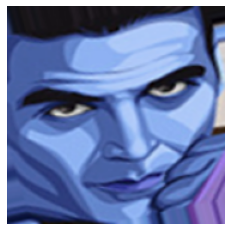

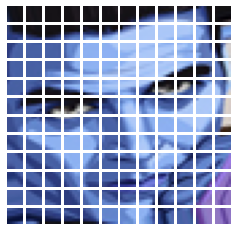

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

num_classes = 4
input_shape = (182, 182, 3)

x_train,y_train = np.load(PATH+'x_train.npy'), np.load(PATH+'y_train.npy')
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(x_train.shape,y_train.shape)

x_test,y_test = np.load(PATH+'x_test.npy'), np.load(PATH+'y_test.npy')
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
print(x_test.shape,y_test.shape)

X = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 70
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = PATH+"/checkpoint/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    earlyStoppingCallback = keras.callbacks.EarlyStopping(patience=120, monitor='val_accuracy', restore_best_weights=True)

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, earlyStoppingCallback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


In [6]:
import json
history_dict = history.history
json.dump(history_dict, open('/content/Data/checkpoint/history_generated', 'w'))

7/7 [==============================] - 1s 13ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        46
           1       0.67      0.76      0.71        67
           2       0.68      0.45      0.54        51
           3       0.84      0.89      0.86        54

    accuracy                           0.77       218
   macro avg       0.77      0.77      0.76       218
weighted avg       0.76      0.77      0.76       218

[[45  0  1  0]
 [ 3 51  9  4]
 [ 0 23 23  5]
 [ 3  2  1 48]]


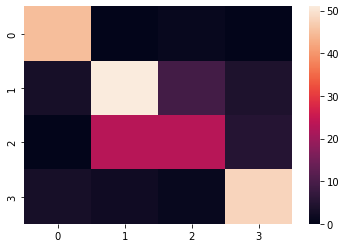

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay, auc
import seaborn as sns
y_predict = vit_classifier.predict(x_test)
y_pred = np.argmax(np.round(y_predict), axis=1)
sns.heatmap(confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
print(confusion_matrix_graph)

**VIT TRAINED ON GENERATED SYNTHETIC IMAGE**

(3315, 182, 182, 3) (3315,)
(369, 182, 182, 3) (369,)
x_train shape: (3315, 182, 182, 3) - y_train shape: (3315,)
x_test shape: (369, 182, 182, 3) - y_test shape: (369,)
Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


Epoch 1/70


12/12 [==============================] - 65s 4s/step - loss: 4.3524 - accuracy: 0.3245 - top-5-accuracy: 1.0000 - val_loss: 1.2962 - val_accuracy: 0.3283 - val_top-5-accuracy: 1.0000
Epoch 2/70
12/12 [==============================] - 50s 4s/step - loss: 1.4326 - accuracy: 0.3895 - top-5-accuracy: 1.0000 - val_loss: 1.2585 - val_accuracy: 0.4608 - val_top-5-accuracy: 1.0000
Epoch 3/70
12/12 [==============================] - 50s 4s/step - loss: 1.3406 - accuracy: 0.4110 - top-5-accuracy: 1.0000 - val_loss: 1.2857 - val_accuracy: 0.4759 - val_top-5-accuracy: 1.0000
Epoch 4/70
12/12 [==============================] - 51s 4s/step - loss: 1.3170 - accuracy: 0.4170 - top-5-accuracy: 1.0000 - val_loss: 1.2378 - val_accuracy: 0.4849 - val_top-5-accuracy: 1.0000
Epoch 5/70
12/12 [==============================] - 50s 4s/step - loss: 1.2732 - accuracy: 0.4435 - top-5-accuracy: 1.0000 - val_loss: 1.2181 - val_accuracy: 0.4880 - val_top-5-accuracy: 1.0000
Epoch 6/70
12/12 [=======================

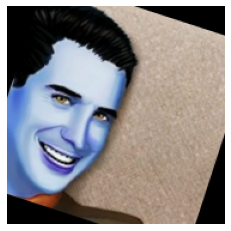

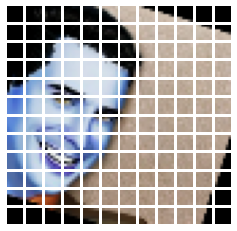

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

num_classes = 4
input_shape = (182, 182, 3)

x_train,y_train = np.load(PATH+'x_gen_train.npy'), np.load(PATH+'y_gen_train.npy')
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(x_train.shape,y_train.shape)

x_test,y_test = np.load(PATH+'x_test.npy'), np.load(PATH+'y_test.npy')
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
print(x_test.shape,y_test.shape)

X = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 70
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = PATH+"/checkpoint/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    earlyStoppingCallback = keras.callbacks.EarlyStopping(patience=120, monitor='val_accuracy', restore_best_weights=True)

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, earlyStoppingCallback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


In [11]:
import json
history_dict = history.history
json.dump(history_dict, open('/content/Data/checkpoint/history_generated', 'w'))

12/12 [==============================] - 1s 12ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73        69
           1       0.70      0.92      0.79       164
           2       0.81      0.54      0.65        96
           3       0.67      0.30      0.41        40

    accuracy                           0.72       369
   macro avg       0.73      0.63      0.65       369
weighted avg       0.73      0.72      0.70       369

[[ 51  12   5   1]
 [  6 151   5   2]
 [  7  34  52   3]
 [  6  20   2  12]]


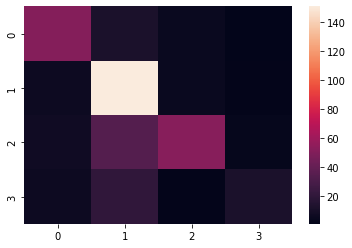

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay, auc
import seaborn as sns

y_predict = vit_classifier.predict(x_test)
y_pred = np.argmax(np.round(y_predict), axis=1)
sns.heatmap(confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
print(confusion_matrix_graph)

**VIT TRAINED ON COMBINED DATASET**

(5125, 182, 182, 3) (5125,)
(369, 182, 182, 3) (369,)
x_train shape: (4944, 182, 182, 3) - y_train shape: (4944,)
x_test shape: (550, 182, 182, 3) - y_test shape: (550,)
Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


Epoch 1/70


24/24 [==============================] - 72s 2s/step - loss: 2.9824 - accuracy: 0.3358 - top-5-accuracy: 1.0000 - val_loss: 1.3334 - val_accuracy: 0.3515 - val_top-5-accuracy: 1.0000
Epoch 2/70
24/24 [==============================] - 59s 2s/step - loss: 1.4061 - accuracy: 0.3718 - top-5-accuracy: 1.0000 - val_loss: 1.2964 - val_accuracy: 0.4303 - val_top-5-accuracy: 1.0000
Epoch 3/70
24/24 [==============================] - 58s 2s/step - loss: 1.3318 - accuracy: 0.3850 - top-5-accuracy: 1.0000 - val_loss: 1.2549 - val_accuracy: 0.4889 - val_top-5-accuracy: 1.0000
Epoch 4/70
24/24 [==============================] - 58s 2s/step - loss: 1.2975 - accuracy: 0.4120 - top-5-accuracy: 1.0000 - val_loss: 1.2298 - val_accuracy: 0.4727 - val_top-5-accuracy: 1.0000
Epoch 5/70
24/24 [==============================] - 58s 2s/step - loss: 1.2624 - accuracy: 0.4390 - top-5-accuracy: 1.0000 - val_loss: 1.2009 - val_accuracy: 0.4990 - val_top-5-accuracy: 1.0000
Epoch 6/70
24/24 [=======================

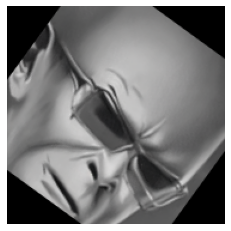

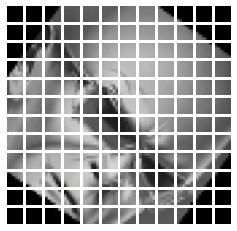

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

num_classes = 4
input_shape = (182, 182, 3)

x_train,y_train = np.load(PATH+'x_combined_train.npy'), np.load(PATH+'y_combined_train.npy')
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(x_train.shape,y_train.shape)

x_test,y_test = np.load(PATH+'x_test.npy'), np.load(PATH+'y_test.npy')
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
print(x_test.shape,y_test.shape)

X = np.concatenate((x_train,x_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 192
num_epochs = 70
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = PATH+"/checkpoint/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    earlyStoppingCallback = keras.callbacks.EarlyStopping(patience=120, monitor='val_accuracy', restore_best_weights=True)

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, earlyStoppingCallback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


In [15]:
import json
history_dict = history.history
json.dump(history_dict, open('/content/Data/checkpoint/history_generated', 'w'))

18/18 [==============================] - 1s 12ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        98
           1       0.77      0.81      0.79       224
           2       0.73      0.61      0.67       129
           3       0.90      0.85      0.88        99

    accuracy                           0.78       550
   macro avg       0.79      0.79      0.78       550
weighted avg       0.78      0.78      0.78       550

[[ 85   5   8   0]
 [ 16 182  20   6]
 [  6  41  79   3]
 [  6   8   1  84]]


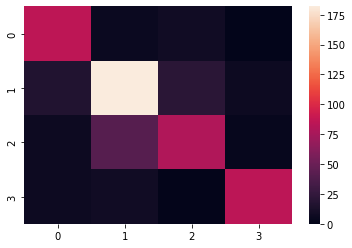

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay, auc
import seaborn as sns

y_predict = vit_classifier.predict(x_test)
y_pred = np.argmax(np.round(y_predict), axis=1)
sns.heatmap(confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
confusion_matrix_graph = confusion_matrix(y_test, y_pred)
print(confusion_matrix_graph)